In [1]:
import pandas as pd

In [4]:
fn = "holders/holder.json"
df = pd.read_json(fn, orient='records')
df.sample(1)

,token_address,rank,holder_name,holder_address,amount,percentage
57508,0xf5238462e7235c7b62811567e63dd17d12c2eaa0,86,0xb82a5dd9e71352f58315d0eaee51b7fdfa469d9e,0xb82a5dd9e71352f58315d0eaee51b7fdfa469d9e,23.201583,0.0230


In [57]:
# Define the percentage buckets
buckets = [0, 1e-1, 5e-1, 1, 5, 10, 50, 100]

# Define a function that maps percentages to their buckets
def map_to_bucket(x):
    try:
        x = float(x.replace(',', ''))
        for i in range(len(buckets) - 1):
            if buckets[i] <= x < buckets[i+1]:
                return i
        return len(buckets) - 1
    except:
        return 0

In [55]:
df[df['token_address'] == "0xcdb37a4fbc2da5b78aa4e41a432792f9533e85cc"]

,token_address,rank,holder_name,holder_address,amount,percentage,bucket
27679,0xcdb37a4fbc2da5b78aa4e41a432792f9533e85cc,1,CheckDot: Deployer,0x961a14beabd590229b1c68a21d7068c8233c8542,10000000.0,100.0000,6


In [58]:
# Apply the mapping function to the percentage column
df['bucket'] = df['percentage'].apply(map_to_bucket)

# Group the DataFrame by address and bucket
grouped = df.groupby(['token_address', 'bucket']).size().reset_index(name='count')

# Print the grouped DataFrame
print(grouped)

                                   token_address  bucket  count
0     0x0000000000004946c0e9F43F4Dee607b0eF1fA1c       1     85
1     0x0000000000004946c0e9F43F4Dee607b0eF1fA1c       2     10
2     0x0000000000004946c0e9F43F4Dee607b0eF1fA1c       3      3
3     0x0000000000004946c0e9F43F4Dee607b0eF1fA1c       4      1
4     0x0000000000004946c0e9F43F4Dee607b0eF1fA1c       5      1
...                                          ...     ...    ...
5029  0xffffffff2ba8f66d4e51811c5190992176930278       1     21
5030  0xffffffff2ba8f66d4e51811c5190992176930278       2      9
5031  0xffffffff2ba8f66d4e51811c5190992176930278       3      6
5032  0xffffffff2ba8f66d4e51811c5190992176930278       4      4
5033  0xffffffff2ba8f66d4e51811c5190992176930278       5      2

[5034 rows x 3 columns]


In [59]:
# Create a pivot table of bucket counts by address
pivot = grouped.pivot_table(index='token_address', columns='bucket', values='count')
pivot = pivot.fillna(0).sort_values(by=[pivot.columns[0], pivot.columns[1]], ascending=False)

In [63]:
import numpy as np
norm_pivot = pivot.apply(lambda row: 100 * row/np.sum(row), axis=1)
norm_pivot

bucket,0,1,2,3,4,5,6,7
token_address,,,,,,,,
0x2008e3057bd734e10ad13c9eae45ff132abc1722,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xcbeaec699431857fdb4d37addbbdc20e132d4903,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xa5ef74068d04ba0809b7379dd76af5ce34ab7c57,99.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0x4f878c0852722b0976a955d68b376e4cd4ae99e5,98.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
0x799a4202c12ca952cb311598a024c80ed371a41e,98.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
0x4d224452801aced8b2f0aebe155379bb5d594381,0.0,50.0,48.0,1.0,1.0,0.0,0.0,0.0
0xc00e94cb662c3520282e6f5717214004a7f26888,0.0,49.0,35.0,13.0,2.0,1.0,0.0,0.0
0x00a35fd824c717879bf370e70ac6868b95870dfb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [65]:
# compute the sum of each row
row_sums = norm_pivot.sum(axis=1)

# filter the rows with sum different than 100
incorrect_rows = pivot[row_sums <= 95]

incorrect_rows

bucket,0,1,2,3,4,5,6,7
token_address,,,,,,,,


C:\Users\Siriu\AppData\Local\Temp\ipykernel_28176\2346256864.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("holder.pdf", bbox_inches='tight')


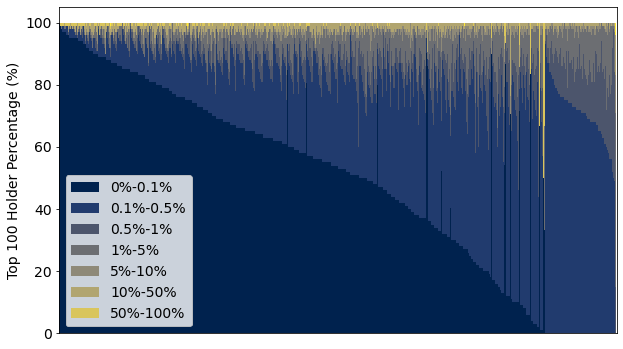

In [79]:
import matplotlib.pyplot as plt
# Set the figure size
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(10, 6))
norm_pivot.plot(kind='bar', stacked=True, width=1, ax=ax, cmap='cividis')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
# set the y-axis label
ax.set_ylabel('Top 100 Holder Percentage (%)')

# remove the x-axis label
ax.set_xlabel('')

# remove the x-axis tick labels
ax.set_xticklabels([])

buckets = [0, 1e-1, 5e-1, 1, 5, 10, 50, 100]
ax.legend([f'{buckets[i]}%-{buckets[i+1]}%' for i in range(len(buckets)-1)])

# Show the chart
plt.savefig("holder.pdf", bbox_inches='tight')
plt.show()
